In [1]:
import os
import csv
import matplotlib.pyplot as plt

In [2]:
os.system("nvprof --csv --print-gpu-trace --log-file profile ./main.exe")

0

In [2]:
def findDuration():
    with open("profile", newline="") as csvfile:
        reader = csv.reader(csvfile, delimiter=",")
        for row in reader:
            for word in row:
                if word == 'histoGPU(int const *, int*, int, unsigned int, unsigned int)':
                    return row[1]

In [13]:
with open("profile", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    i = 0
    tempsTotal = 0 
    for row in reader:
        if (i >= 5):
            tempsTotal += float(row[1])
            print(row[1], "->", row[18])
        i += 1
    print("Temps total", tempsTotal)

60.672000 -> [CUDA memcpy HtoD]
43.136000 -> rgb2hsv(unsigned char*, int, float*, float*, int*)
24.544000 -> histogram(int*, int*, int)
22.432000 -> repart(int*, int*, int*)
0.608000 -> [CUDA memcpy DtoH]
2.080000 -> [CUDA memcpy DtoD]
17.504000 -> equalization(int*, float*, int)
30.944000 -> hsv2rgb(unsigned char*, int, float*, float*, float*)
58.560000 -> [CUDA memcpy DtoH]
79.936000 -> [CUDA memcpy DtoH]
Temps total 340.41600000000005


In [4]:
# Les tests sont effectués avec 100 000 données et 256 de distribution
N = [1,2,4,8,16,32,64,128,256,512,1024]
durations = []
for n in N:
    os.system("nvprof --csv --print-gpu-trace --log-file profile ./tp3_ex1.exe -n 100000 -d 256 -N " + str(n))
    durations.append(findDuration())
print(durations)

['45.664000', '45.760000', '46.464000', '47.392000', '47.232000', '50.017000', '49.728000', '52.576000', '64.000000', '120.032000', '236.128000']


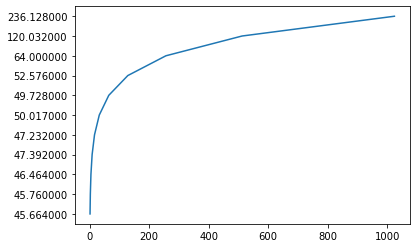

In [6]:
plt.plot(N,durations)
plt.show()

On peut voir sur le graphique que la meilleure valeur obtenue soit le temps minimal et pour N = 1024
On peut expliquer cela par le fait que l'on est obligé de limiter les accès à la mémoire avec la fonction atomicAdd pour ne pas avoir plusieurs accès en même temps et que certaines données ne soit écrasé
Ce qui permet de limiter la synchronisation (ce qui prend le plus de temps) est de prendre la plus grande range -> 1024